In [2]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
from scipy.interpolate import UnivariateSpline, make_interp_spline, make_lsq_spline
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

rho = 2.39
A = 2


def epsilon(L, W):
    return 1 - (W / (rho * A * L))


def kay(dP, Q, L, t):
    eta = 1.797  # https://mterm-pro.com/viscosity/ at 20 degree Celsius
    return (eta * L * Q) / (dP * A * t)


def Sw(epsilon, k):
    return 14 / rho * (epsilon**3 / (k * (1 - epsilon) ** 2)) ** 0.5
    # return epsilon**3 / (k*(1-epsilon)**2)


def dm(Sw):
    return 6 / (rho * Sw)


def init_df():
    df = pd.DataFrame(
        columns=["dP", "Q", "A", "L", "W", "epsilon", "t", "k", "Sw", "dm"],
        index=range(0, 9),
    )
    df["dP"][0:3] = 15
    df["dP"][3:6] = 30
    df["dP"][6:9] = 60
    df["Q"][0:3] = [5, 10, 20]
    df["Q"][3:6] = [5, 10, 20]
    df["Q"][6:9] = [5, 10, 20]
    return df


def compute_df(df, L, W, t):
    df["A"] = A
    df["L"] = L
    df["W"] = W
    df["epsilon"] = epsilon(df["L"].values, df["W"].values)
    df["t"] = t
    df["k"] = kay(df["dP"].values, df["Q"].values, df["L"].values, t)
    df["Sw"] = Sw(
        df["epsilon"].values,
        df["k"].values,
    )
    df["dm"] = dm(df["Sw"])
    return df


def display_df(df):
    return df["dP"].values


def division(X, division_number=50):
    return np.linspace(np.min(X), np.max(X), division_number)


def spline(X, Y, k=3, division_number=50):
    # model = make_interp_spline(X,AY,k=k)
    model = UnivariateSpline(X, Y, k=k)
    # model = make_lsq_spline(X, Y, t=np.arange(len(X)), k=k)
    # X_spline = np.linspace(X[0], X[-1], division_number)
    X_spline = division(X)
    Y_spline = model(X_spline)
    return X_spline, Y_spline


def polyreg(X, Y, degree, test_value):
    X = X.reshape(-1, 1)
    Y = Y.reshape(-1, 1)
    test_value = test_value.reshape(-1, 1)
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X, Y)
    return model.predict(test_value)

In [3]:
warnings.simplefilter(action="ignore", category=FutureWarning)
pd.options.display.float_format = "{:.2e}".format

df_list = []
W = np.array([2.74, 2.52, 2.40, 2.13, 2.18])
t = np.array(
    [
        [34.42, 67.81, 135.73, 9.06, 18.46, 37.42, 3.29, 6.6, 13.45],
        [8.07, 16.49, 33.16, 3.96, 8.15, 17.21, 4.26, 8.91, 17.77],
        [75.53, 154.55, 305.47, 50.8, 100.5, 203.79, 22.79, 47.13, 93.33],
        [4.07, 7.86, 16.13, 3.67, 7.59, 15.16, 3.92, 8.18, 16.03],
        [13.44, 26.45, 53.52, 5.13, 10.22, 20.39, 2.87, 5.86, 11.8],
    ]
)


for i in range(5):
    df = init_df()
    df = compute_df(df, 1, W[i], t[i])
    df_list.append(df)


for df in df_list:
    display(df)

name = ('0.50','0.54','0.56','0.58','0.60')
for i in range(5):
    df_list[i].to_csv(name[i] + ".csv")

,dP,Q,A,L,W,epsilon,t,k,Sw,dm
0,15,5,2,1,2.74e+00,4.27e-01,3.44e+01,8.70e-03,3.05e+01,8.22e-02
1,15,10,2,1,2.74e+00,4.27e-01,6.78e+01,8.83e-03,3.03e+01,8.28e-02
2,15,20,2,1,2.74e+00,4.27e-01,1.36e+02,8.83e-03,3.03e+01,8.28e-02
3,30,5,2,1,2.74e+00,4.27e-01,9.06e+00,1.65e-02,2.22e+01,1.13e-01
4,30,10,2,1,2.74e+00,4.27e-01,1.85e+01,1.62e-02,2.24e+01,1.12e-01
5,30,20,2,1,2.74e+00,4.27e-01,3.74e+01,1.60e-02,2.25e+01,1.11e-01
6,60,5,2,1,2.74e+00,4.27e-01,3.29e+00,2.28e-02,1.89e+01,1.33e-01
7,60,10,2,1,2.74e+00,4.27e-01,6.60e+00,2.27e-02,1.89e+01,1.33e-01
8,60,20,2,1,2.74e+00,4.27e-01,1.34e+01,2.23e-02,1.91e+01,1.31e-01


,dP,Q,A,L,W,epsilon,t,k,Sw,dm
0,15,5,2,1,2.52e+00,4.73e-01,8.07e+00,3.71e-02,1.88e+01,1.34e-01
1,15,10,2,1,2.52e+00,4.73e-01,1.65e+01,3.63e-02,1.90e+01,1.32e-01
2,15,20,2,1,2.52e+00,4.73e-01,3.32e+01,3.61e-02,1.90e+01,1.32e-01
3,30,5,2,1,2.52e+00,4.73e-01,3.96e+00,3.78e-02,1.86e+01,1.35e-01
4,30,10,2,1,2.52e+00,4.73e-01,8.15e+00,3.67e-02,1.88e+01,1.33e-01
5,30,20,2,1,2.52e+00,4.73e-01,1.72e+01,3.48e-02,1.94e+01,1.30e-01
6,60,5,2,1,2.52e+00,4.73e-01,4.26e+00,1.76e-02,2.72e+01,9.21e-02
7,60,10,2,1,2.52e+00,4.73e-01,8.91e+00,1.68e-02,2.79e+01,9.01e-02
8,60,20,2,1,2.52e+00,4.73e-01,1.78e+01,1.69e-02,2.78e+01,9.02e-02


,dP,Q,A,L,W,epsilon,t,k,Sw,dm
0,15,5,2,1,2.40e+00,4.98e-01,7.55e+01,3.97e-03,6.51e+01,3.86e-02
1,15,10,2,1,2.40e+00,4.98e-01,1.55e+02,3.88e-03,6.58e+01,3.81e-02
2,15,20,2,1,2.40e+00,4.98e-01,3.05e+02,3.92e-03,6.55e+01,3.84e-02
3,30,5,2,1,2.40e+00,4.98e-01,5.08e+01,2.95e-03,7.55e+01,3.33e-02
4,30,10,2,1,2.40e+00,4.98e-01,1.00e+02,2.98e-03,7.51e+01,3.34e-02
5,30,20,2,1,2.40e+00,4.98e-01,2.04e+02,2.94e-03,7.56e+01,3.32e-02
6,60,5,2,1,2.40e+00,4.98e-01,2.28e+01,3.29e-03,7.15e+01,3.51e-02
7,60,10,2,1,2.40e+00,4.98e-01,4.71e+01,3.18e-03,7.27e+01,3.45e-02
8,60,20,2,1,2.40e+00,4.98e-01,9.33e+01,3.21e-03,7.24e+01,3.47e-02


,dP,Q,A,L,W,epsilon,t,k,Sw,dm
0,15,5,2,1,2.31e+00,5.17e-01,4.07e+00,7.36e-02,1.66e+01,1.51e-01
1,15,10,2,1,2.31e+00,5.17e-01,7.86e+00,7.62e-02,1.63e+01,1.54e-01
2,15,20,2,1,2.31e+00,5.17e-01,1.61e+01,7.43e-02,1.65e+01,1.52e-01
3,30,5,2,1,2.31e+00,5.17e-01,3.67e+00,4.08e-02,2.23e+01,1.13e-01
4,30,10,2,1,2.31e+00,5.17e-01,7.59e+00,3.95e-02,2.27e+01,1.11e-01
5,30,20,2,1,2.31e+00,5.17e-01,1.52e+01,3.95e-02,2.27e+01,1.11e-01
6,60,5,2,1,2.31e+00,5.17e-01,3.92e+00,1.91e-02,3.26e+01,7.71e-02
7,60,10,2,1,2.31e+00,5.17e-01,8.18e+00,1.83e-02,3.33e+01,7.54e-02
8,60,20,2,1,2.31e+00,5.17e-01,1.60e+01,1.87e-02,3.29e+01,7.62e-02


,dP,Q,A,L,W,epsilon,t,k,Sw,dm
0,15,5,2,1,2.18e+00,5.44e-01,1.34e+01,2.23e-02,3.45e+01,7.27e-02
1,15,10,2,1,2.18e+00,5.44e-01,2.64e+01,2.26e-02,3.42e+01,7.33e-02
2,15,20,2,1,2.18e+00,5.44e-01,5.35e+01,2.24e-02,3.44e+01,7.29e-02
3,30,5,2,1,2.18e+00,5.44e-01,5.13e+00,2.92e-02,3.02e+01,8.32e-02
4,30,10,2,1,2.18e+00,5.44e-01,1.02e+01,2.93e-02,3.01e+01,8.34e-02
5,30,20,2,1,2.18e+00,5.44e-01,2.04e+01,2.94e-02,3.01e+01,8.35e-02
6,60,5,2,1,2.18e+00,5.44e-01,2.87e+00,2.61e-02,3.19e+01,7.87e-02
7,60,10,2,1,2.18e+00,5.44e-01,5.86e+00,2.56e-02,3.22e+01,7.79e-02
8,60,20,2,1,2.18e+00,5.44e-01,1.18e+01,2.54e-02,3.23e+01,7.76e-02


[0.74523479 0.76569039 0.77684796 0.78521615 0.79730356]
[array([91.41311646, 67.87931824, 57.55217361]), array([51.16441345, 52.12741089, 74.90907288]), array([166.63206482, 192.47784424, 184.21072388]), array([40.4269104 , 55.42656326, 80.60279846]), array([79.83964539, 69.69219971, 74.9776001 ])]
[array([56.92834091, 57.0147934 , 57.55217361]), array([73.35428619, 75.01438904, 74.90907288]), array([182.05661011, 185.12625122, 184.21072388]), array([79.71799469, 81.42823029, 80.60279846]), array([73.95397186, 74.7230072 , 74.9776001 ])]


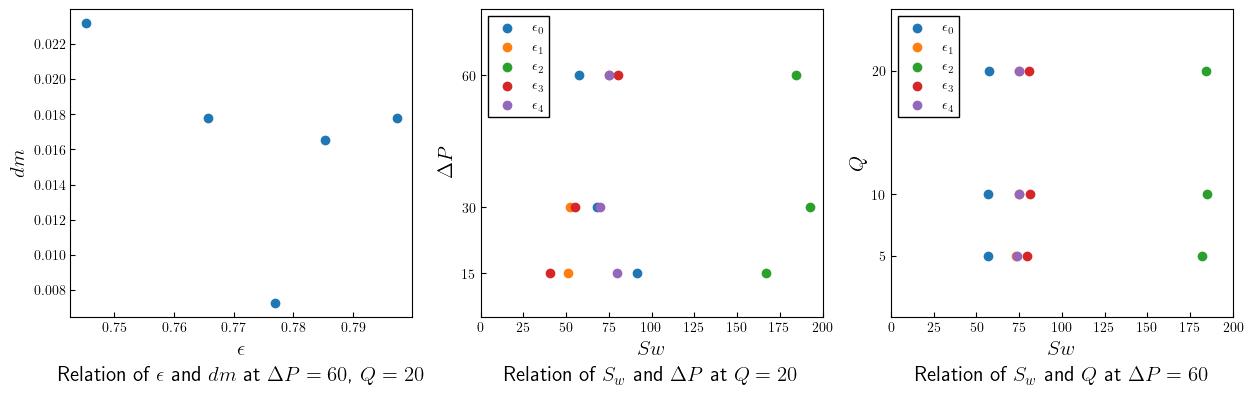

In [78]:
X = [np.array([]), [], []]
Y = [np.array([]), [], []]
for i in range(3):
    for df in df_list:
        x = np.array([])
        y = np.array([])
        if i == 0:
            X[i] = np.append(
                X[i],
                df[(df["dP"] == 60) & (df["Q"] == 20)]["epsilon"].values.astype(
                    np.float32
                ),
            )
            Y[i] = np.append(
                Y[i],
                df[(df["dP"] == 60) & (df["Q"] == 20)]["dm"].values.astype(np.float32),
            )

        if i == 1:
            X[i].append(np.append(x, df[df["Q"] == 20]["Sw"].values.astype(np.float32)))
            Y[i].append(np.append(y, df[df["Q"] == 20]["dP"].values.astype(np.float32)))

        if i == 2:
            X[i].append(
                np.append(x, df[df["dP"] == 60]["Sw"].values.astype(np.float32))
            )
            Y[i].append(np.append(y, df[df["dP"] == 60]["Q"].values.astype(np.float32)))


plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.serif"] = "cmr"
plt.rcParams["font.sans-serif"] = "cmss"
plt.rcParams["font.monospace"] = "cmtt"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["axes.formatter.use_mathtext"] = True
plt.rcParams["text.usetex"] = True
# plt.rcParams['figure.dpi'] = 300
plt.rcParams["axes.titlesize"] = 15
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titley"] = -0.23
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["legend.edgecolor"] = "black"
labels = [
    r"$\epsilon_0$",
    r"$\epsilon_1$",
    r"$\epsilon_2$",
    r"$\epsilon_3$",
    r"$\epsilon_4$",
]
titles = [
    "Relation of $\epsilon$ and $dm$ at $\Delta P=60$, $Q=20$",
    "Relation of $S_w$ and $\Delta P$ at $Q=20$",
    "Relation of $S_w$ and $Q$ at $\Delta P=60$",
]

fig, ax = plt.subplots(1, 3, figsize=(15, 4))


for i in range(3):
    if i == 0:
        # xs, ys = spline(X[i], Y[i])
        ax[i].scatter(X[i], Y[i])
        # ax[i].plot(xs, ys)
        ax[i].set_title(titles[i])
        ax[i].set_xlabel("$\epsilon$")
        ax[i].set_ylabel("$dm$")
    if i > 0:
        for j in range(5):
            ax[i].scatter(X[i][j], Y[i][j], label=labels[j])
            # ys, xs = spline(Y[i][j], X[i][j], k=2)
            # ax[i].plot(xs, ys)
            # ax[i].plot(X[i][j], Y[i][j])
            ax[i].set_xlim(0, 200)
            ax[i].set_xlabel("$Sw$")
            ax[i].set_title(titles[i])
            ax[i].legend()

ax[1].set_ylim(5, 75)
ax[1].set_yticks([15, 30, 60])
ax[1].set_ylabel("$\Delta P$")
ax[2].set_ylim(0, 25)
ax[2].set_yticks([5, 10, 20])
ax[2].set_ylabel("$Q$")


plt.savefig("graph.png", bbox_inches="tight")
plt.savefig("graph.pdf", bbox_inches="tight")

for i in range(3):
    print(X[i])

error: (m>k) failed for hidden m: fpcurf0:m=3

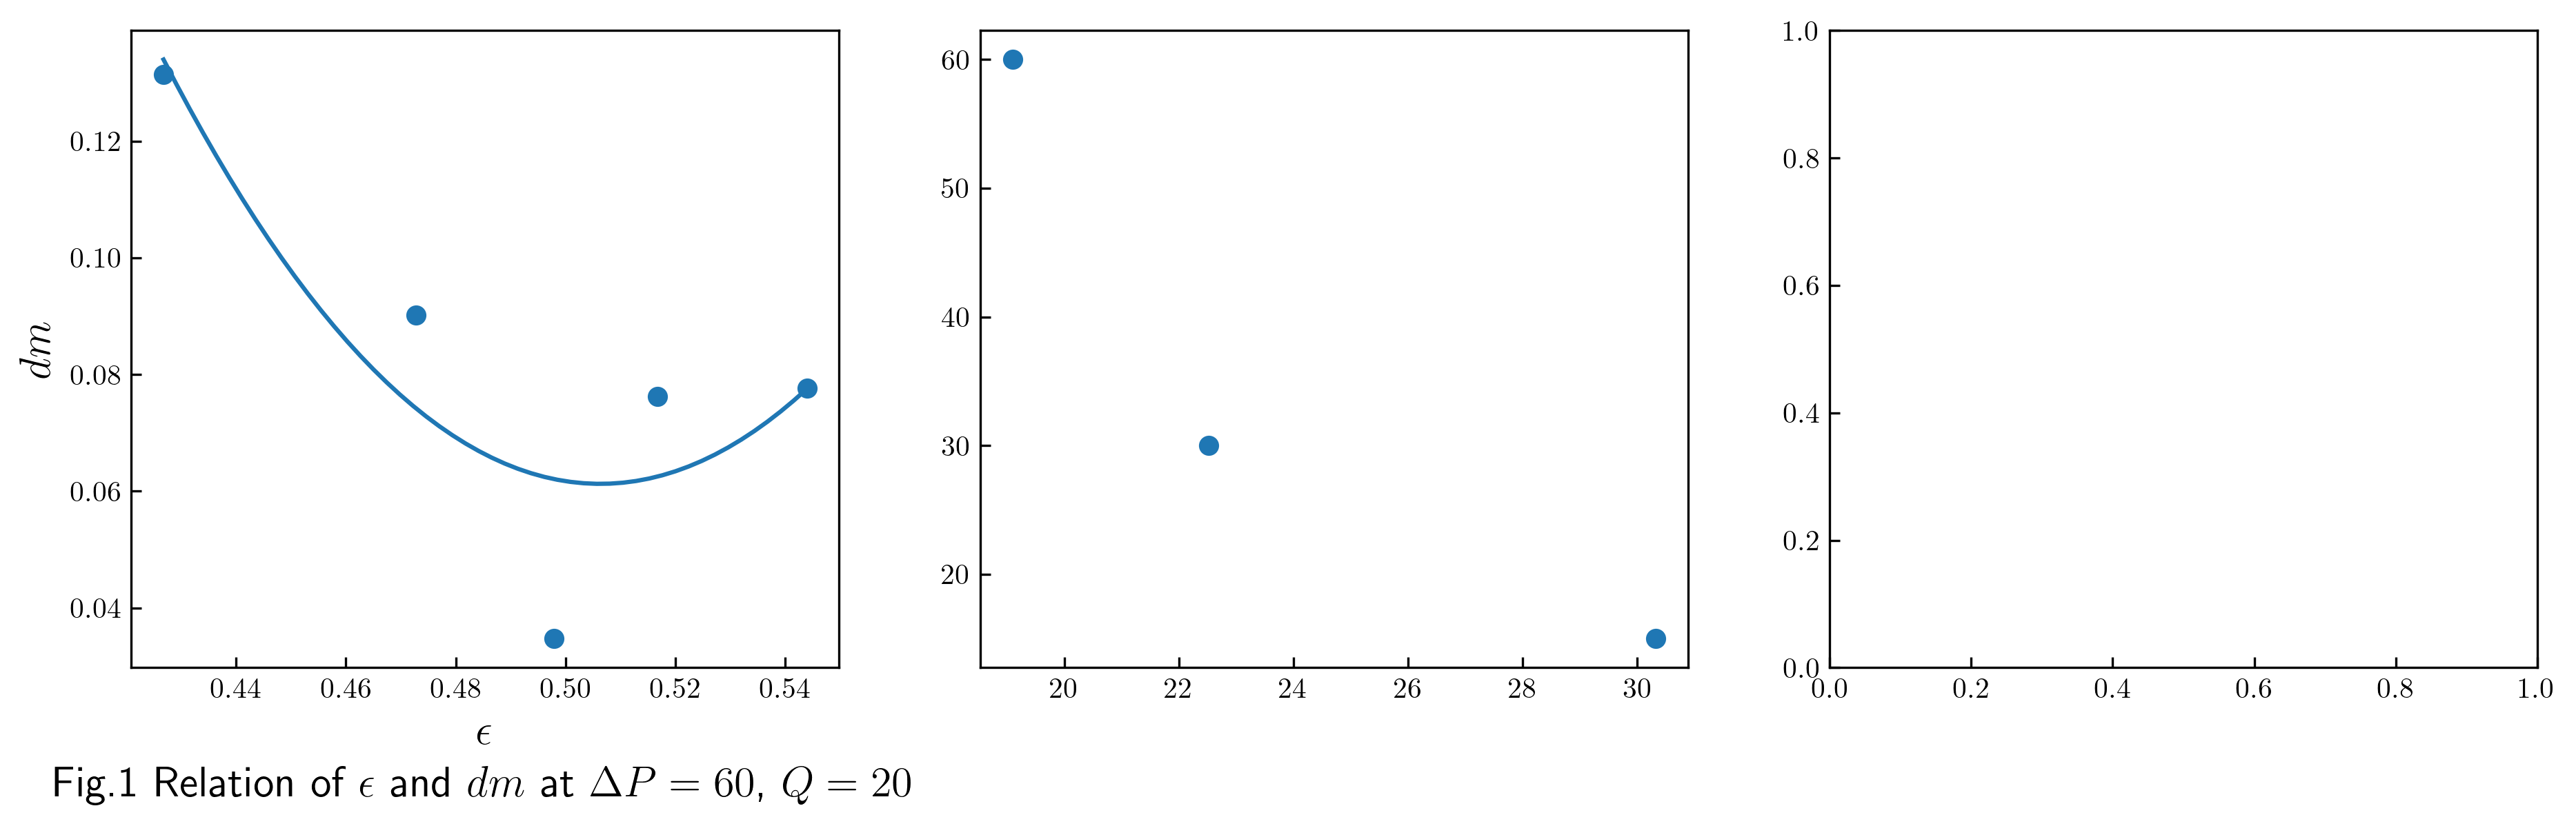

In [5]:
X = [np.array([]), [], []]
Y = [np.array([]), [], []]
for i in range(3):
    for df in df_list:
        x = np.array([])
        y = np.array([])
        if i == 0:
            X[i] = np.append(
                X[i],
                df[(df["dP"] == 60) & (df["Q"] == 20)]["epsilon"].values.astype(
                    np.float32
                ),
            )
            Y[i] = np.append(
                Y[i],
                df[(df["dP"] == 60) & (df["Q"] == 20)]["dm"].values.astype(np.float32),
            )

        if i == 1:
            X[i].append(np.append(x, df[df["Q"] == 20]["Sw"].values.astype(np.float32)))
            Y[i].append(np.append(y, df[df["Q"] == 20]["dP"].values.astype(np.float32)))

        if i == 2:
            X[i].append(
                np.append(x, df[df["dP"] == 60]["Sw"].values.astype(np.float32))
            )
            Y[i].append(np.append(y, df[df["dP"] == 60]["Q"].values.astype(np.float32)))


plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.serif"] = "cmr"
plt.rcParams["font.sans-serif"] = "cmss"
plt.rcParams["font.monospace"] = "cmtt"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["axes.formatter.use_mathtext"] = True
plt.rcParams["text.usetex"] = True
# plt.rcParams['figure.dpi'] = 300
plt.rcParams["axes.titlesize"] = 15
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titley"] = -0.23
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["legend.edgecolor"] = "black"
labels = [
    r"$\epsilon_0$",
    r"$\epsilon_1$",
    r"$\epsilon_2$",
    r"$\epsilon_3$",
    r"$\epsilon_4$",
]
titles = [
    "Fig.1 Relation of $\epsilon$ and $dm$ at $\Delta P=60$, $Q=20$",
    "Fig.2 Relation of $S_w$ and $\Delta P$ at $Q=20$",
    "Fig.3 Relation of $S_w$ and $Q$ at $\Delta P=60$",
]

fig, ax = plt.subplots(1, 3, figsize=(15, 4), dpi=300)


for i in range(3):
    if i == 0:
        X[i][3], X[i][4] = X[i][4], X[i][3]
        Y[i][3], Y[i][4] = Y[i][4], Y[i][3]
        xs, ys = spline(np.sort(X[i]), Y[i], k=2)
        # ys = polyreg(X[i], Y[i], 2, X[i])
        ax[i].scatter(X[i], Y[i])
        ax[i].plot(xs, ys)
        ax[i].set_title(titles[i])
        ax[i].set_xlabel("$\epsilon$")
        ax[i].set_ylabel("$dm$")
    if i > 0:
        for j in range(5):
            ax[i].scatter(X[i][j], Y[i][j], label=labels[j])
            ys, xs = spline(Y[i][j], X[i][j], k=3)
            # ax[i].plot(xs, ys)
            ax[i].plot(X[i][j], Y[i][j])
            ax[i].set_xlim(0, 200)
            ax[i].set_xlabel("$Sw$")
            ax[i].set_title(titles[i])
            ax[i].legend()

ax[1].set_ylim(5, 75)
ax[1].set_yticks([15, 30, 60])
ax[1].set_ylabel("$\Delta P$")
ax[2].set_ylim(0, 25)
ax[2].set_yticks([5, 10, 20])
ax[2].set_ylabel("$Q$")


plt.savefig("graph.png", bbox_inches="tight")
plt.savefig("graph.pdf", bbox_inches="tight")

X[0]

In [79]:
xs[np.where(ys == ys.min())]

array([52.45499802])